In [1]:
print("""
@Description: 输入/输出操作
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-21 17:07:47
""")


@Description: 输入/输出操作
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-21 17:07:47



# 输入/输出操作

## Python 基本 I/O

In [2]:
from pylab import plt, mpl
plt.rcParams['figure.figsize'] = (10, 6)
import pickle
import numpy as np
from random import gauss
import os.path

In [3]:
a = [gauss(1.5, 2) for i in range(1_000_000)]
path = './'
pkl_file = open(path + 'data.pkl', 'wb')

In [4]:
%time pickle.dump(a, pkl_file)
pkl_file.close()

CPU times: total: 0 ns
Wall time: 31.9 ms


In [5]:
os.path.getsize('data.pkl')

9003247

In [6]:
pkl_file = open(path + 'data.pkl', 'rb')
%time b = pickle.load(pkl_file)

CPU times: total: 62.5 ms
Wall time: 86.9 ms


In [7]:
a[:3]

[-0.26462317561293247, 3.135227048816916, 1.8859363322054152]

In [8]:
b[:3]

[-0.26462317561293247, 3.135227048816916, 1.8859363322054152]

In [9]:
assert np.allclose(a[:3], b[:3])

In [10]:
pkl_file = open(path + 'data.pkl', 'wb')
%time pickle.dump(np.array(a), pkl_file)
%time pickle.dump(np.array(a) ** 2, pkl_file)
pkl_file.close()

CPU times: total: 31.2 ms
Wall time: 69.2 ms
CPU times: total: 31.2 ms
Wall time: 87.6 ms


In [11]:
os.path.getsize('data.pkl')

16000324

In [12]:
pkl_file = open(path + 'data.pkl', 'rb')
x = pickle.load(pkl_file)
x[:4]

array([-0.26462318,  3.13522705,  1.88593633,  2.41784367])

In [13]:
y = pickle.load(pkl_file)
y[:4]

array([0.07002543, 9.82964865, 3.55675585, 5.845968  ])

In [14]:
pkl_file.close()

 显然，`pickle` 按照先进先出（FIFO）原则保存对象，这种方法由一个重大问题：**没有任何的可用元数据可以让用户知道保存在 pickle 文件中的是什么**

In [15]:
pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file)
pkl_file.close()

In [16]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
type(data)

dict

In [17]:
for key in data.keys():
    print(key, data[key][:4])

x [-0.26462318  3.13522705  1.88593633  2.41784367]
y [0.07002543 9.82964865 3.55675585 5.845968  ]


这种方法要求我们一次性写入和读取所有的对象，在许多情况下，需要为了更便利而容忍这个问题。

警告：
兼容性问题

### 读取和写入文本文件

In [18]:
import numpy as np
rows = 5_000
a = np.random.standard_normal((rows, 5)).round(4)
a

array([[ 0.6317,  0.6022, -1.1995, -0.5169, -0.6389],
       [ 0.7819,  2.0862,  0.5994,  0.4937,  1.4022],
       [-0.4212,  0.1095,  0.1044, -0.5704, -0.9459],
       ...,
       [-0.4958, -0.5253, -1.0771,  0.2846, -2.4519],
       [-2.1778, -1.9403,  1.0202,  0.1771, -0.6146],
       [-0.2971, -1.2999,  0.2286, -0.5239,  0.5249]])

In [19]:
import pandas as pd
t = pd.date_range(start='2019/1/1', periods=rows, freq='H')
t

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [20]:
csv_file = open(path + 'data.csv', 'w')
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [21]:
len(header)

25

In [22]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = f'{t_},{no1},{no2},{no3},{no4},{no5}\n'
    csv_file.write(s)
csv_file.close()

In [23]:
os.path.getsize('data.csv')

289862

----

In [24]:
csv_file = open(path + 'data.csv', 'r')
for i in range(5):
    print(csv_file.readline(), end='')
csv_file.close()

date,no1,no2,no3,no4,no5
2019-01-01 00:00:00,0.6317,0.6022,-1.1995,-0.5169,-0.6389
2019-01-01 01:00:00,0.7819,2.0862,0.5994,0.4937,1.4022
2019-01-01 02:00:00,-0.4212,0.1095,0.1044,-0.5704,-0.9459
2019-01-01 03:00:00,1.113,-0.0429,0.8224,-1.1913,-1.0835


----

In [25]:
csv_file = open(path + 'data.csv', 'r')
# 结果是一个列表对象，包含表示所有行的单独字符串对象。
content = csv_file.readlines()
content[:5]

['date,no1,no2,no3,no4,no5\n',
 '2019-01-01 00:00:00,0.6317,0.6022,-1.1995,-0.5169,-0.6389\n',
 '2019-01-01 01:00:00,0.7819,2.0862,0.5994,0.4937,1.4022\n',
 '2019-01-01 02:00:00,-0.4212,0.1095,0.1044,-0.5704,-0.9459\n',
 '2019-01-01 03:00:00,1.113,-0.0429,0.8224,-1.1913,-1.0835\n']

In [26]:
csv_file.close()

----

In [27]:
import csv

In [28]:
with open(path + 'data.csv', 'r') as f:
    # csv.reader()将每一行当成一个列表对象返回。
    csv_reader = csv.reader(f)
    lines = [line for line in csv_reader]

In [29]:
lines[:5]

[['date', 'no1', 'no2', 'no3', 'no4', 'no5'],
 ['2019-01-01 00:00:00', '0.6317', '0.6022', '-1.1995', '-0.5169', '-0.6389'],
 ['2019-01-01 01:00:00', '0.7819', '2.0862', '0.5994', '0.4937', '1.4022'],
 ['2019-01-01 02:00:00', '-0.4212', '0.1095', '0.1044', '-0.5704', '-0.9459'],
 ['2019-01-01 03:00:00', '1.113', '-0.0429', '0.8224', '-1.1913', '-1.0835']]

In [30]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.DictReader(f)
    # csv.DictReader()将每一行当成字典对象返回，
    lines = [line for line in csv_reader]
lines[:3]

[{'date': '2019-01-01 00:00:00',
  'no1': '0.6317',
  'no2': '0.6022',
  'no3': '-1.1995',
  'no4': '-0.5169',
  'no5': '-0.6389'},
 {'date': '2019-01-01 01:00:00',
  'no1': '0.7819',
  'no2': '2.0862',
  'no3': '0.5994',
  'no4': '0.4937',
  'no5': '1.4022'},
 {'date': '2019-01-01 02:00:00',
  'no1': '-0.4212',
  'no2': '0.1095',
  'no3': '0.1044',
  'no4': '-0.5704',
  'no5': '-0.9459'}]

### 使用 SQL 数据库

In [31]:
import sqlite3 as sq3

In [32]:
# 打开一个数据库连接；创建一个文件（如果不存在）。
if os.path.exists('numbs.db'):
    os.remove('numbs.db')
con = sq3.connect(path + 'numbs.db')
query = 'CREATE TABLE numbs (Date date, No1 reel, No2 real)'
con.execute(query)
con.commit()

In [33]:
q = con.execute
# 读取关于数据库的元信息，将刚刚创建的表显示为单个对象。
q('SELECT * FROM sqlite_master').fetchall()

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 reel, No2 real)')]

In [34]:
import datetime
now = datetime.datetime.now()
q('INSERT INTO numbs VALUES (?, ?, ?)', (now, .12, 7.3))

In [35]:
np.random.seed(100)
data = np.random.standard_normal((10_000, 2)).round(4)

In [36]:
%%time
for row in data:
    now = datetime.datetime.now()
    q('INSERT INTO numbs VALUES(?, ?, ?)', (now, row[0], row[1]))
con.commit()

CPU times: total: 78.1 ms
Wall time: 159 ms


In [37]:
q('SELECT * FROM numbs').fetchmany(3)

[('2023-07-23 14:49:17.517556', 0.12, 7.3),
 ('2023-07-23 14:49:17.574003', -1.7498, 0.3427),
 ('2023-07-23 14:49:17.575016', 1.153, -0.2524)]

In [38]:
pointer = q("SELECT * FROM numbs")
for i in range(3):
    print(pointer.fetchone())

('2023-07-23 14:49:17.517556', 0.12, 7.3)
('2023-07-23 14:49:17.574003', -1.7498, 0.3427)
('2023-07-23 14:49:17.575016', 1.153, -0.2524)


In [39]:
# 重复运行就将没有结果，因为指针已经指到最后了（不确定）
rows = pointer.fetchall()
rows[:3]

[('2023-07-23 14:49:17.575016', 0.9813, 0.5142),
 ('2023-07-23 14:49:17.575016', 0.2212, -1.07),
 ('2023-07-23 14:49:17.575016', -0.1895, 0.255)]

In [40]:
q('DROP TABLE IF EXISTS numbs')

In [41]:
q('SELECT * FROM sqlite_master').fetchall()

[]

In [42]:
con.close()

### 读写 Numpy 数组

In [43]:
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00',
                   dtype='datetime64[m]')
len(dtimes)

3681360

In [44]:
dty = np.dtype([('Date', 'datetime64[m]'),
                ('No1', 'f'),
                ('No2', 'f'),])
data = np.zeros(len(dtimes), dtype=dty)

In [45]:
data['Date'] = dtimes

In [46]:
a = np.random.standard_normal((len(dtimes), 2)).round(4)

In [47]:
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [48]:
data.nbytes

58901760

In [49]:
%time np.save(path + 'array', data)

CPU times: total: 0 ns
Wall time: 79.7 ms


In [50]:
os.path.getsize('array.npy')

58901952

In [51]:
%time np.load(path + 'array.npy')

CPU times: total: 15.6 ms
Wall time: 49 ms


array([('2019-01-01T10:00',  1.5131,  0.6973),
       ('2019-01-01T10:01', -1.722 , -0.4815),
       ('2019-01-01T10:02',  0.8251,  0.3019), ...,
       ('2025-12-31T21:57',  1.372 ,  0.6446),
       ('2025-12-31T21:58', -1.2542,  0.1612),
       ('2025-12-31T21:59', -1.1997, -1.097 )],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [52]:
%time data = np.random.standard_normal((10_000, 6_000)).round(4)

CPU times: total: 1.23 s
Wall time: 2.93 s


In [53]:
data.nbytes

480000000

In [54]:
%time np.save(path + 'array', data)

CPU times: total: 125 ms
Wall time: 602 ms


In [55]:
os.path.getsize('array.npy')

480000128

In [56]:
%time np.load(path + 'array.npy')

CPU times: total: 172 ms
Wall time: 321 ms


array([[ 0.3066,  0.5951,  0.5826, ...,  1.6773,  0.4294, -0.2216],
       [ 0.8769,  0.7292, -0.9557, ...,  0.5084,  0.9635, -0.4443],
       [-1.2202, -2.5509, -0.0575, ..., -1.6128,  0.4662, -1.3645],
       ...,
       [-0.5598,  0.2393, -2.3716, ...,  1.7669,  0.2462,  1.035 ],
       [ 0.273 ,  0.8216, -0.0749, ..., -0.0552, -0.8396,  0.3077],
       [-0.6305,  0.8331,  1.3702, ...,  0.3493,  0.1981,  0.2037]])

## pandas 的 I/O

In [57]:
data = np.random.standard_normal((1_000_000, 5)).round(4)
data[:3]

array([[ 0.4918,  1.3707,  0.137 ,  0.3981, -1.0059],
       [ 0.4516,  1.4445,  0.0555, -0.0397,  0.44  ],
       [ 0.1629, -0.8473, -0.8223, -0.4621, -0.5137]])

### 使用 SQL 数据库

In [58]:
if os.path.exists(path + 'numbers.db'):
    os.remove(path + 'numbers.db')
filename = path + 'numbers'
con = sq3.Connection(filename + '.db')
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real)'
q = con.execute
qm = con.executemany
q(query)

In [59]:
%%time
qm('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

CPU times: total: 2.66 s
Wall time: 4.83 s


In [60]:
os.path.getsize('numbers.db')

52633600

In [61]:
%%time
temp = q('SELECT * FROM numbers').fetchall()
print(temp[:3])

[(0.4918, 1.3707, 0.137, 0.3981, -1.0059), (0.4516, 1.4445, 0.0555, -0.0397, 0.44), (0.1629, -0.8473, -0.8223, -0.4621, -0.5137)]
CPU times: total: 1.17 s
Wall time: 2.5 s


In [62]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 1 and No2 < 0'
res = np.array(q(query).fetchall()).round(3)

CPU times: total: 266 ms
Wall time: 611 ms


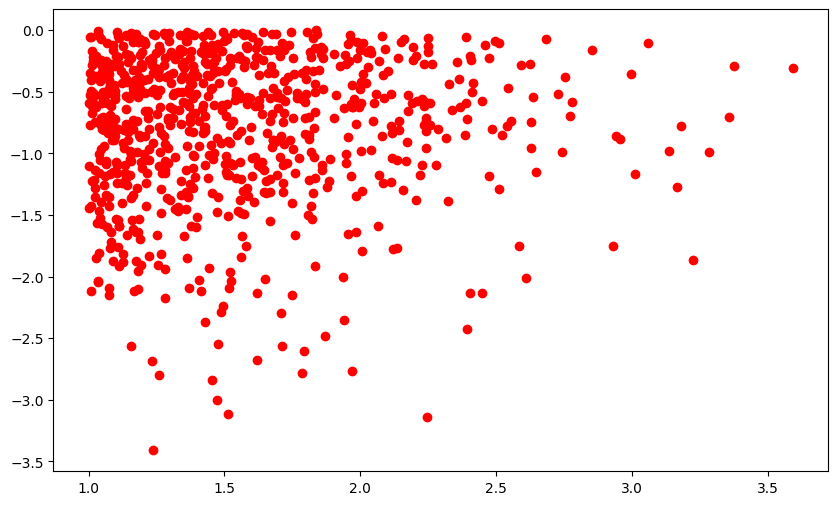

In [63]:
res = res[::100]
plt.figure()
plt.plot(res[:, 0], res[:, 1], 'ro')

### 从 SQL 到 pandas

In [64]:
%time data = pd.read_sql('SELECT * FROM numbers', con)

CPU times: total: 1.42 s
Wall time: 2.93 s


In [65]:
data.head()

,No1,No2,No3,No4,No5
0,0.4918,1.3707,0.1370,0.3981,-1.0059
1,0.4516,1.4445,0.0555,-0.0397,0.4400
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
3,1.3064,0.9125,0.5142,-0.7868,-0.3398
4,-0.1148,-1.5215,-0.7045,-1.0042,-0.0600


In [66]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

CPU times: total: 0 ns
Wall time: 34.2 ms


,No1,No2,No3,No4,No5
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
5,0.1893,-0.0207,-0.2104,0.9419,0.2551
8,1.4784,-0.3333,-0.7050,0.3586,-0.3937
10,0.8092,-0.9899,1.0364,-1.0453,0.0579
11,0.9065,-0.7757,-0.9267,0.7797,0.0863


In [67]:
%%time
q = '(No1 < -.5 | No1 > .5) & (No2 < -1 | No2 > 1)'
res = data[['No1', 'No2']].query(q)

CPU times: total: 0 ns
Wall time: 44.2 ms


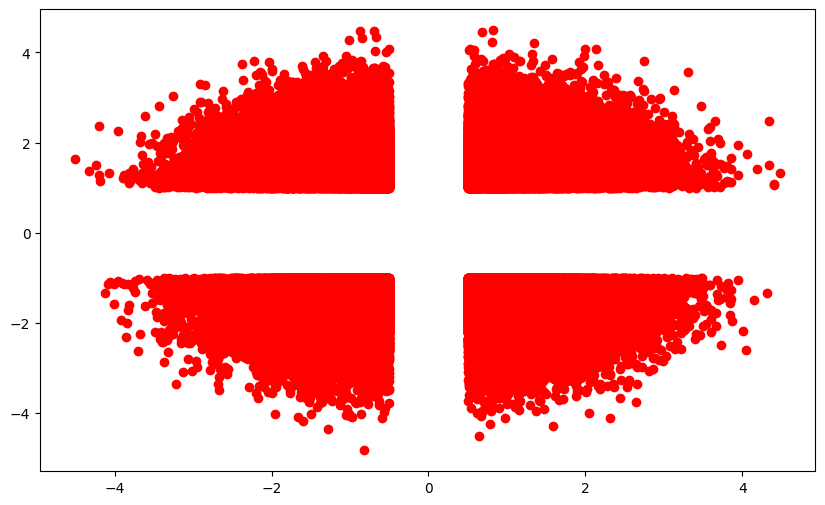

In [68]:
plt.figure()
plt.plot(res['No1'], res['No2'], 'ro')

In [69]:
h5s = pd.HDFStore(filename + '.h5s', 'w')
%time h5s['data'] = data

CPU times: total: 15.6 ms
Wall time: 100 ms


In [70]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: ./numbers.h5s

In [71]:
h5s.close()

In [72]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
data_ = h5s['data']
h5s.close()

CPU times: total: 62.5 ms
Wall time: 160 ms


In [73]:
data_ is data

False

In [74]:
(data_ == data).all()

No1    True
No2    True
No3    True
No4    True
No5    True
dtype: bool

In [75]:
np.allclose(data_, data)

True

### 使用 CSV 文件

In [76]:
%time data.to_csv(filename + '.csv')

CPU times: total: 2.55 s
Wall time: 6.62 s


In [77]:
file_list = [file for file in os.listdir() if 'numbers' in file]
for file in file_list:
    print(f'{file:15}', os.path.getsize(file))

numbers.csv     44834158
numbers.db      52633600
numbers.h5s     48007240
numbers.xlsx    4012935


In [78]:
%time df = pd.read_csv(filename + '.csv')

CPU times: total: 344 ms
Wall time: 763 ms


array([[<Axes: title={'center': 'No1'}>, <Axes: title={'center': 'No2'}>],
       [<Axes: title={'center': 'No3'}>, <Axes: title={'center': 'No4'}>]],
      dtype=object)

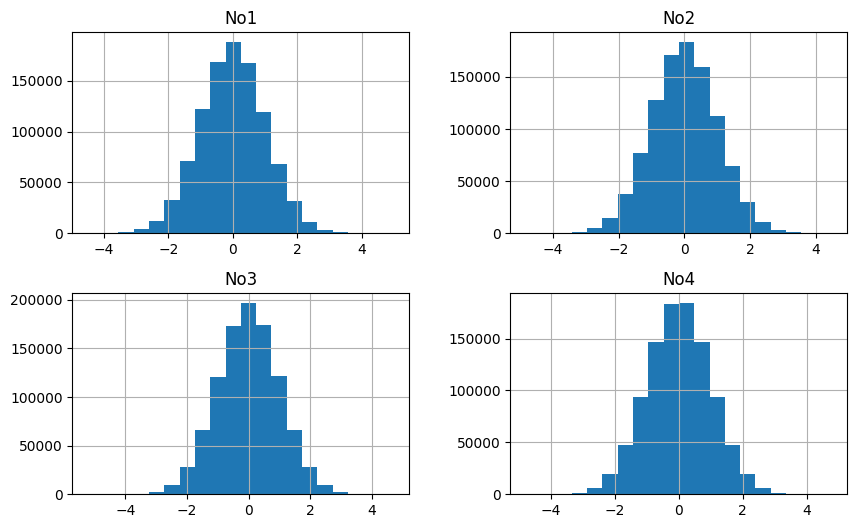

In [79]:
df[['No1', 'No2', 'No3', 'No4']].hist(bins=20)

### 使用 Excel 文件

In [80]:
%time data[:100_000].to_excel(filename + '.xlsx')

CPU times: total: 12.2 s
Wall time: 25.2 s


In [81]:
%time df = pd.read_excel(filename + '.xlsx', 'Sheet1')

CPU times: total: 4.56 s
Wall time: 11 s


<Axes: >

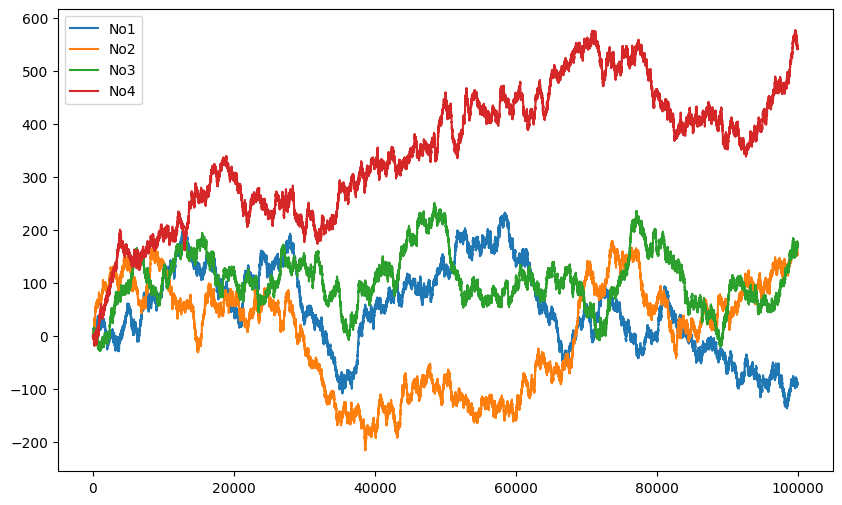

In [84]:
df[['No1', 'No2', 'No3', 'No4']].cumsum().plot()

In [85]:
file_list = [file for file in os.listdir() if 'numbers' in file]
for file in file_list:
    print(f'{file:15}', os.path.getsize(file))

numbers.csv     44834158
numbers.db      52633600
numbers.h5s     48007240
numbers.xlsx    4012935
